## Part 1: Using existing use case for the ICP

Import Libraries

In [3]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

Import Data 

In [4]:
# reading the data and looking at the first fifteen rows of the data
data=pd.read_csv("/content/Mall_Customers.csv")
data.head(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Rename Columns

In [5]:
data.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
data.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Statistics

In [6]:
# statistics of the data
data.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Let's use the relevant numerical columns from the original data

In [7]:
df_Short = data[['Age', 'Spending_Score','Income']]

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [8]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_Short)

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-1.121325e-16,-6.128431e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.910021e+00,-1.738999e+00
25%,-7.248436e-01,-5.997931e-01,-7.275093e-01
50%,-2.045351e-01,-7.764312e-03,3.587926e-02
75%,7.284319e-01,8.851316e-01,6.656748e-01
max,2.235532e+00,1.894492e+00,2.917671e+00


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [9]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We have initialized two clusters and evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [10]:
# inertia on the fitted data
kmeans.inertia_

389.3861889564372

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

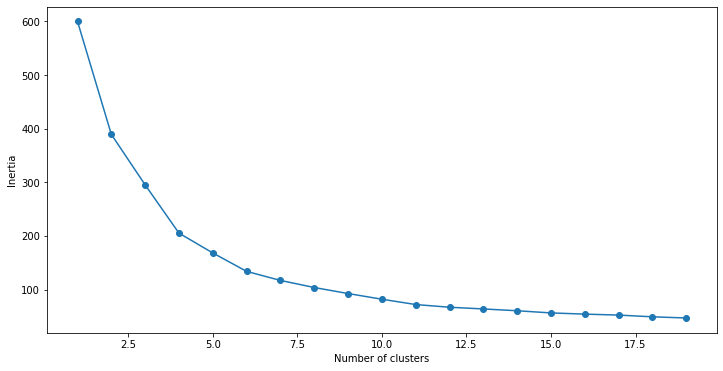

In [11]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 5 to 7. Let’s set the number of clusters as 5 and fit the model:

In [12]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

Finally, let’s look at the value count of points in each of the above-formed clusters:

In [13]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    54
1    47
0    40
4    39
3    20
Name: cluster, dtype: int64

So, there are 22 data points belonging to cluster 4 (index 3), then 81 points in cluster 2 (index 1), and so on.

In [14]:
frame

,0,1,2,cluster
0,-1.424569,-0.434801,-1.738999,2
1,-1.281035,1.195704,-1.738999,2
2,-1.352802,-1.715913,-1.700830,3
3,-1.137502,1.040418,-1.700830,2
4,-0.563369,-0.395980,-1.662660,2
...,...,...,...,...
195,-0.276302,1.118061,2.268791,0
196,0.441365,-0.861839,2.497807,4
197,-0.491602,0.923953,2.497807,0
198,-0.491602,-1.250054,2.917671,4


# Part 2: k-means clustering with minor changes 

### Import the data and rename the columns

In [15]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1.Segmentation using Age and Spending Score

### Elbow Method to Identify Clusters
Run Cluster Analysis 10 times

Selecting N Clusters based in Inertia (Squared Distance between Centroids and data points, should be less)
* We run the Cluster Analysis using Cluster as 1 till 10. Also, we 
store the WSS Scores. The WSS score will be used to create the Elbow Plot
* WSS = Within-Cluster-Sum of Squared

*	algorithm='elkan’

Use of Elkan's algorithm which accelerates k-means by avoiding redundant distance calculations. Elkan's algorithm reduces the number of distance calculations in practice closer to n.
* n_init = 10

Number of times the k-means algorithm will be run with different centroid seeds. The results will be the best output of n_init consecutive runs in terms of inertia.
* random_state= 111

Used a constant number of random_state every time so that it generates results with integrity.
*	tol=0.0001

Tolerance - A value to see if algorithm has converged. If the error is greater than the give tolerance value, continue running the algorithm until it gets below the tolerance value. Maximum Iterations - Maximum number of times we need to run the algorithm until the error gets below the give tolerance value.


In [17]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 111, algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

### Elbow Plot

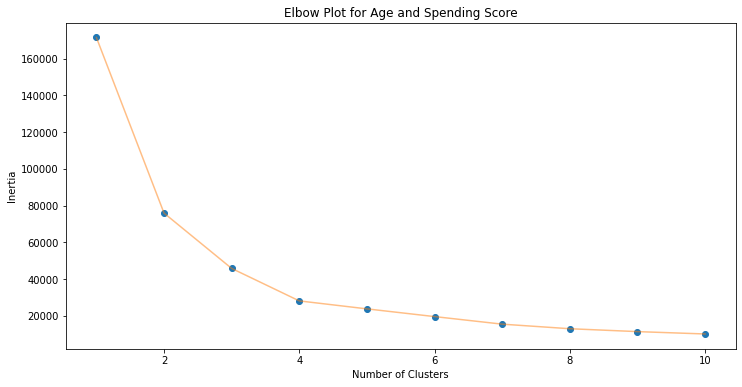

In [18]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Plot for Age and Spending Score")
plt.show()

### Silhouette Method to Identify Clusters

In [26]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [27]:
for i in range(3,11):
    labels= cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(X1).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X1, labels,metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.4530012701652126
Silhouette score for k(clusters) = 4 is 0.49973941540141753
Silhouette score for k(clusters) = 5 is 0.44526667994351227
Silhouette score for k(clusters) = 6 is 0.43906811854494876
Silhouette score for k(clusters) = 7 is 0.42313509747504796
Silhouette score for k(clusters) = 8 is 0.4305548672407991
Silhouette score for k(clusters) = 9 is 0.41038847746650914
Silhouette score for k(clusters) = 10 is 0.4150825941572905


From above values of Silhouette Scores, it is cleara that k=4 has the best score of all.

### Perform K-Mean Clustering with 4 Clusters

In [28]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

### Plot Clusters on Chart for Age and Spending Score

In [29]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

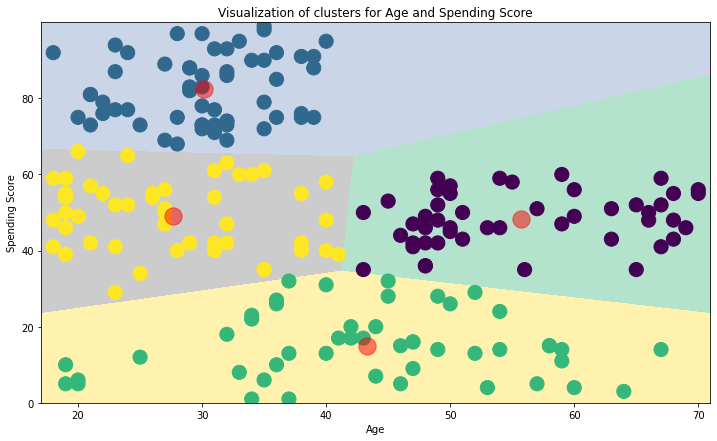

In [30]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending_Score' , data = df , c = labels1 , s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score') , plt.xlabel('Age')
plt.title("Visualization of clusters for Age and Spending Score")
plt.show()

## 2.Segmentation using Annual Income and Spending Score

In [31]:
'''Annual Income and spending Score'''
X2 = df[['Income' , 'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

### Elbow Method to Identify Clusters

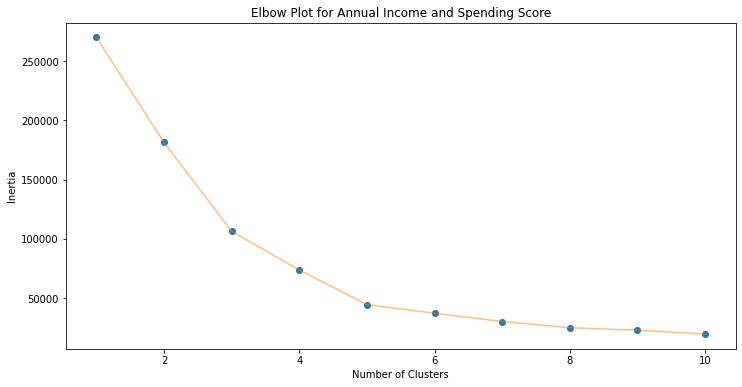

In [32]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Plot for Annual Income and Spending Score")
plt.show()

### Silhouette Method to Identify Clusters

In [33]:
for i in range(3,11):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(X2).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X2, labels,metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.46761358158775423
Silhouette score for k(clusters) = 4 is 0.4931963109249047
Silhouette score for k(clusters) = 5 is 0.553931997444648
Silhouette score for k(clusters) = 6 is 0.53976103063432
Silhouette score for k(clusters) = 7 is 0.5288104473798049
Silhouette score for k(clusters) = 8 is 0.4572211842776841
Silhouette score for k(clusters) = 9 is 0.45819645551960536
Silhouette score for k(clusters) = 10 is 0.45275118302579015


From above values of Silhouette Scores, it is cleara that k=5 has the best score of all.

### Perform K-Mean Clustering with 5 Clusters

In [34]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

### Plot Clusters on Chart for Age and Spending Score

In [35]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

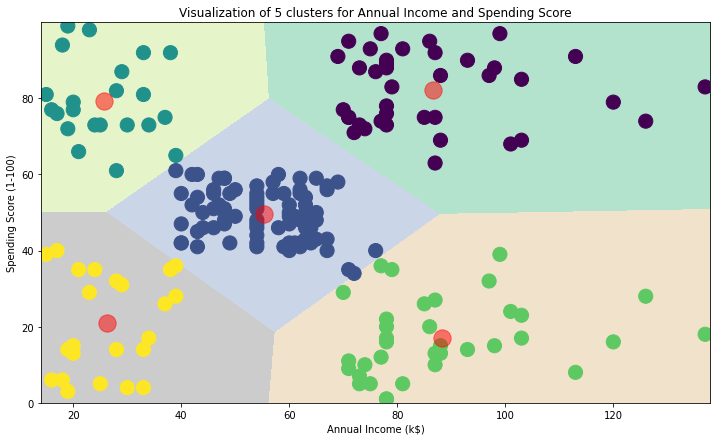

In [36]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income', y = 'Spending_Score', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300 , c = 'red', alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.title("Visualization of 5 clusters for Annual Income and Spending Score")
plt.show()

## 3.Segmentation using Age , Annual Income and Spending Score

In [37]:
'''Age, Annual Income, and spending Score'''

X3 = df[['Age' , 'Income' ,'Spending_Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

### Elbow Method to Identify Clusters

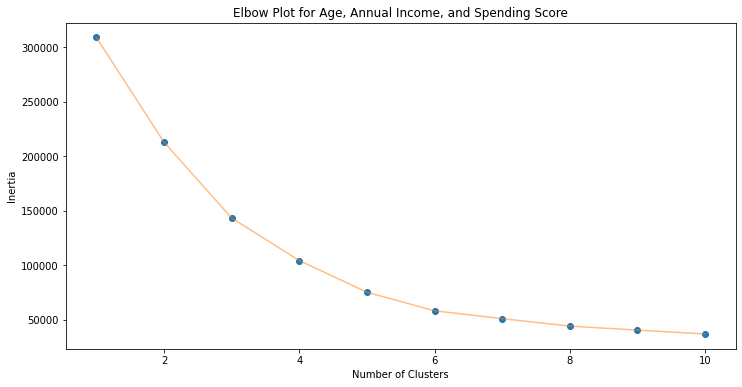

In [38]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.title("Elbow Plot for Age, Annual Income, and Spending Score")
plt.show()

### Silhouette Method to Identify Clusters

In [39]:
for i in range(3,11):
    labels=cluster.KMeans(n_clusters=i, init="k-means++", random_state=200).fit(X3).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X3, labels,metric="euclidean", sample_size=1000, random_state=200)))

Silhouette score for k(clusters) = 3 is 0.3839349967742105
Silhouette score for k(clusters) = 4 is 0.4054630207773331
Silhouette score for k(clusters) = 5 is 0.44428597560893024
Silhouette score for k(clusters) = 6 is 0.45234439477240534
Silhouette score for k(clusters) = 7 is 0.44125523526699084
Silhouette score for k(clusters) = 8 is 0.42786362446871096
Silhouette score for k(clusters) = 9 is 0.4096301136432198
Silhouette score for k(clusters) = 10 is 0.37672414426446066


From above values of Silhouette Scores, it is cleara that k=6 has the best score of all.

### Perform K-Mean Clustering with 6 Clusters

In [40]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

### Plot Clusters on Chart for Age, Annual Income, and Spending Score

In [41]:
import plotly.graph_objs as go
import plotly as py

In [42]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending_Score'],
    z= df['Income'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters representation for Age, Spending Score, and Annual Income',
     margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),    
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)